# **DATSCIENCE**

COURSE PROJET
                      

*IMPORTING ALL THE LIBRARIES*

In [693]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import statistics
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

*IMPORTING FILES*

In [694]:
df = pd.read_excel('CollectedData (1).xlsx',sheet_name="Sheet4")
names = ['Age', 'Clo', 'Met', 'Dewpt', 'PlaneRadTemp', 'TA', 'Tmrt', 'Vel', 'AirTurb','Pa','Rh','TaOutdoor','RhOutdoor','AMV','PMV']
df = pd.read_excel('CollectedData (1).xlsx',"Sheet4",names=names)

Sheet4 contains all the required coloumns to be preprocessed from the original file

 
# ***PART A***


1. **APPLYING PREPROSESSING STEPS**
 

data information:

In [695]:
df

,Age,Clo,Met,Dewpt,PlaneRadTemp,TA,Tmrt,Vel,AirTurb,Pa,Rh,TaOutdoor,RhOutdoor,AMV,PMV
0,NaN,0.78,2.1,NaN,NaN,19.100000,19.629472,0.06,NaN,NaN,51.3,11.55,79.0,2.0,0.51
1,NaN,1.05,2.1,NaN,NaN,20.000000,19.046655,0.06,NaN,NaN,51.9,11.55,79.0,1.0,0.80
2,NaN,0.40,2.6,NaN,NaN,21.000000,20.153116,0.06,NaN,NaN,49.9,11.55,79.0,3.0,0.76
3,NaN,0.37,3.0,NaN,NaN,23.000000,21.942458,0.06,NaN,NaN,45.6,11.55,79.0,3.0,1.47
4,NaN,1.29,2.1,NaN,NaN,19.800000,19.429333,0.06,NaN,NaN,51.4,11.55,79.0,1.0,0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12560,1996.0,NaN,0.1,22.122,NaN,22.142437,NaN,NaN,67.42325,22.3,22.9,NaN,0.0,1.0,NaN
12561,1996.0,NaN,0.1,22.122,NaN,22.142437,NaN,NaN,67.42325,22.3,21.4,NaN,0.0,1.0,NaN
12562,1996.0,NaN,0.1,22.122,NaN,22.142437,NaN,NaN,67.42325,22.3,23.1,NaN,0.0,1.0,NaN
12563,1996.0,NaN,0.1,22.122,NaN,22.142437,NaN,NaN,67.42325,22.3,22.0,NaN,0.0,1.0,NaN


In [696]:
df.head()

,Age,Clo,Met,Dewpt,PlaneRadTemp,TA,Tmrt,Vel,AirTurb,Pa,Rh,TaOutdoor,RhOutdoor,AMV,PMV
0,NaN,0.78,2.1,NaN,NaN,19.1,19.629472,0.06,NaN,NaN,51.3,11.55,79.0,2.0,0.51
1,NaN,1.05,2.1,NaN,NaN,20.0,19.046655,0.06,NaN,NaN,51.9,11.55,79.0,1.0,0.80
2,NaN,0.40,2.6,NaN,NaN,21.0,20.153116,0.06,NaN,NaN,49.9,11.55,79.0,3.0,0.76
3,NaN,0.37,3.0,NaN,NaN,23.0,21.942458,0.06,NaN,NaN,45.6,11.55,79.0,3.0,1.47
4,NaN,1.29,2.1,NaN,NaN,19.8,19.429333,0.06,NaN,NaN,51.4,11.55,79.0,1.0,0.97


In [697]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12565 entries, 0 to 12564
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           9650 non-null   float64
 1   Clo           11159 non-null  float64
 2   Met           10678 non-null  float64
 3   Dewpt         9014 non-null   float64
 4   PlaneRadTemp  5544 non-null   float64
 5   TA            12545 non-null  float64
 6   Tmrt          8864 non-null   float64
 7   Vel           8865 non-null   float64
 8   AirTurb       6965 non-null   float64
 9   Pa            7910 non-null   float64
 10  Rh            12530 non-null  float64
 11  TaOutdoor     11197 non-null  float64
 12  RhOutdoor     12546 non-null  float64
 13  AMV           12510 non-null  float64
 14  PMV           11869 non-null  float64
dtypes: float64(15)
memory usage: 1.4 MB


In [698]:
df.shape

(12565, 15)

In [699]:
result = df.dtypes  #datatype
print(result)

Age             float64
Clo             float64
Met             float64
Dewpt           float64
PlaneRadTemp    float64
TA              float64
Tmrt            float64
Vel             float64
AirTurb         float64
Pa              float64
Rh              float64
TaOutdoor       float64
RhOutdoor       float64
AMV             float64
PMV             float64
dtype: object


In [700]:

df.describe()  #other information

,Age,Clo,Met,Dewpt,PlaneRadTemp,TA,Tmrt,Vel,AirTurb,Pa,Rh,TaOutdoor,RhOutdoor,AMV,PMV
count,9650.000000,11159.000000,10678.000000,9014.000000,5544.000000,12545.000000,8864.000000,8865.000000,6965.000000,7910.000000,12530.000000,11197.000000,12546.000000,12510.000000,11869.000000
mean,308.637202,0.778503,1.065907,13.621447,0.217785,23.179187,23.450693,0.112445,18.265870,5.123996,42.528507,17.175087,61.098939,0.100584,-0.073711
std,680.115105,0.221999,0.428882,5.903044,1.041164,1.432984,1.502489,0.079044,25.041109,8.156136,15.061475,10.665415,24.704364,1.102012,0.538025
min,0.000000,0.150000,0.100000,-1.953000,-7.420000,15.960000,16.610000,0.000000,0.000000,0.000000,7.400000,-24.900000,0.000000,-3.000000,-4.170000
25%,26.000000,0.630000,1.000000,9.600000,-0.230000,22.300000,22.589671,0.068000,0.320000,1.226667,29.300000,11.350000,53.769937,-0.700000,-0.400000
50%,35.000000,0.751700,1.100000,14.100000,0.200000,23.136667,23.359219,0.100000,0.500000,1.550667,43.276815,18.200000,68.795799,0.000000,-0.030000
75%,45.000000,0.880000,1.241468,17.337500,0.600000,23.900000,24.250000,0.140000,38.815000,1.985333,55.500188,26.600000,76.950000,1.000000,0.260000
max,1996.000000,2.130000,4.500000,26.896750,11.700000,31.000000,37.445000,1.880000,102.450000,27.700000,79.300000,32.350000,100.350000,3.000000,2.500000


In [701]:
#median of statistics lib using the NULL values too
#print(s.median(df.Age))
#print(s.median(df.Clo))
#print(s.median(df.Met))
#print(s.median(df.Dewpt))
#print(s.median(df.PlaneRadTemp))
#print(s.median(df.TA))
#print(s.median(df.Tmrt))
#print(s.median(df.Vel))
#print(s.median(df.AirTurb))
#print(s.median(df.Pa))
#print(s.median(df.Rh))
#print(s.median(df.TaOutdoor))
#print(s.median(df.RhOutdoor))
#print(s.median(df.AMV))
#print(s.median(df.PMV))
print('MEDIAN USING NaNmedian() of numpy lib to find median without the effect of NULL values\n')

print(np.nanmedian(df.Age))
print(np.nanmedian(df.Clo))
print(np.nanmedian(df.Met))
print(np.nanmedian(df.Dewpt))
print(np.nanmedian(df.PlaneRadTemp))
print(np.nanmedian(df.TA))
print(np.nanmedian(df.Tmrt))
print(np.nanmedian(df.Vel))
print(np.nanmedian(df.AirTurb))
print(np.nanmedian(df.Pa))
print(np.nanmedian(df.Rh))
print(np.nanmedian(df.TaOutdoor))
print(np.nanmedian(df.RhOutdoor))
print(np.nanmedian(df.AMV))
print(np.nanmedian(df.PMV))


MEDIAN USING NaNmedian() of numpy lib to find median without the effect of NULL values

35.0
0.7517000000000001
1.1
14.1
0.2
23.136666666666667
23.359219155321334
0.1
0.5
1.5506666666666669
43.27681475840521
18.2
68.79579929928357
0.0
-0.03


In [702]:
import statistics as s

print(s.mode(df.Age))
print(s.mode(df.Clo))
print(s.mode(df.Met))
print(s.mode(df.Dewpt))
print(s.mode(df.PlaneRadTemp))
print(s.mode(df.TA))
print(s.mode(df.Tmrt))
print(s.mode(df.Vel))
print(s.mode(df.AirTurb))
print(s.mode(df.Pa))
print(s.mode(df.Rh))
print(s.mode(df.TaOutdoor))
print(s.mode(df.RhOutdoor))
print(s.mode(df.AMV))
print(s.mode(df.PMV))


24.0
0.77
1.0
17.4
0.3
23.2
22.5
0.1
0.5
2.1
64.0
27.555555555555557
0.0
0.0
0.1


In [703]:
df.isna().sum()  #checking for missing values

Age             2915
Clo             1406
Met             1887
Dewpt           3551
PlaneRadTemp    7021
TA                20
Tmrt            3701
Vel             3700
AirTurb         5600
Pa              4655
Rh                35
TaOutdoor       1368
RhOutdoor         19
AMV               55
PMV              696
dtype: int64

In [704]:
print(df.var())  #variance (before removing null values)

Age             462556.556104
Clo                  0.049284
Met                  0.183939
Dewpt               34.845928
PlaneRadTemp         1.084022
TA                   2.053443
Tmrt                 2.257475
Vel                  0.006248
AirTurb            627.057129
Pa                  66.522562
Rh                 226.848017
TaOutdoor          113.751067
RhOutdoor          610.305583
AMV                  1.214430
PMV                  0.289471
dtype: float64



2.   **HISTOGRAM AND BOXPLOT**


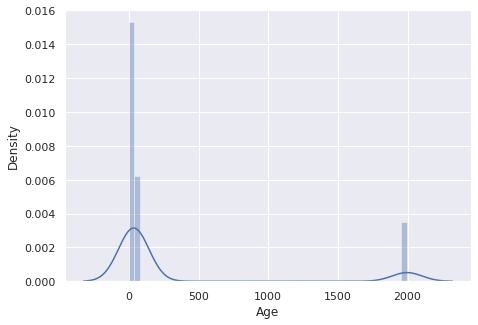

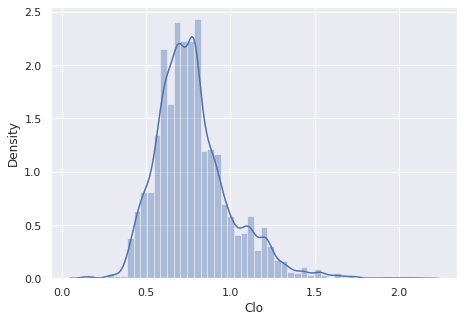

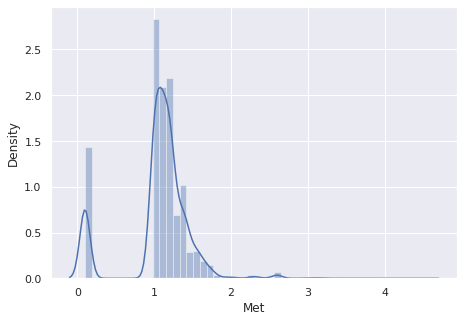

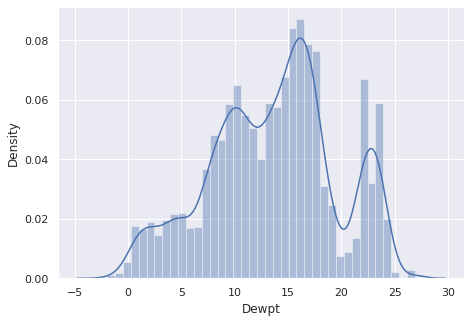

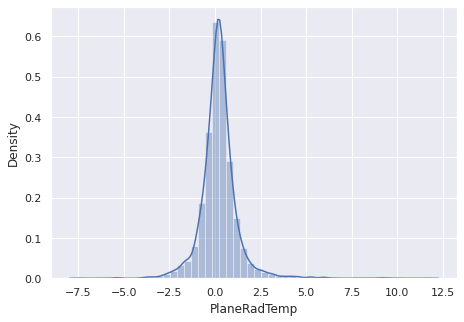

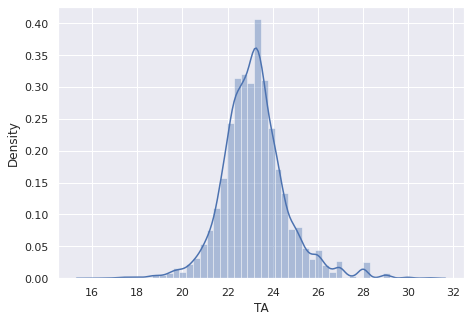

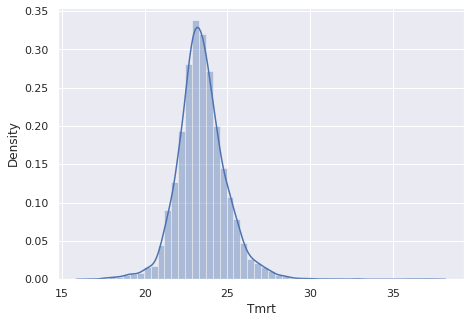

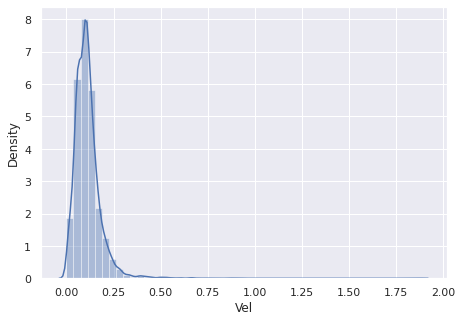

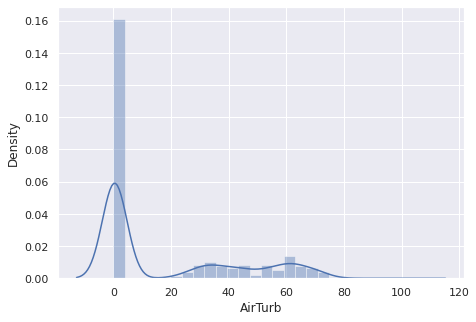

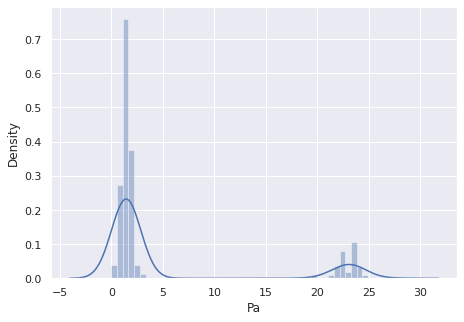

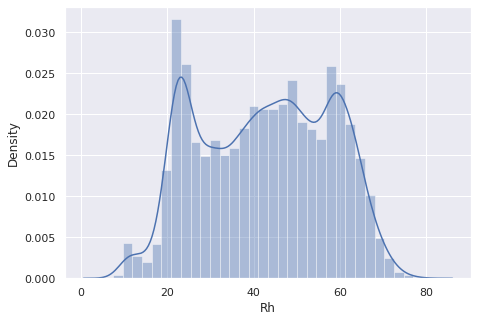

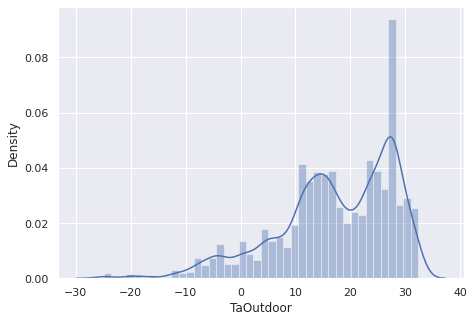

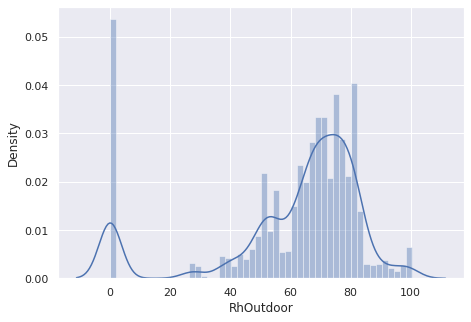

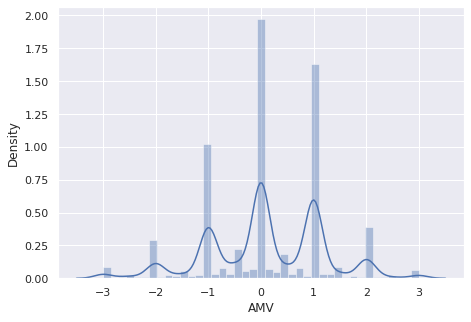

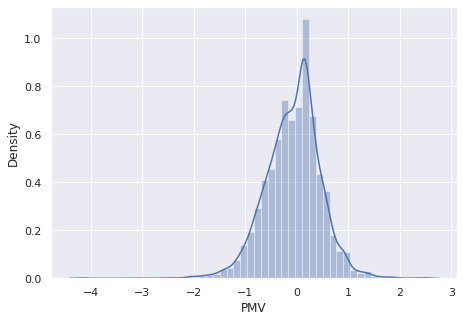

In [705]:
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Age'])
plt.show()

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Clo'])
plt.show()

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Met'])
plt.show()

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Dewpt'])
plt.show()

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['PlaneRadTemp'])
plt.show()

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['TA'])
plt.show()

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Tmrt'])
plt.show()

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Vel'])
plt.show()

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['AirTurb'])
plt.show()

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Pa'])
plt.show()

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Rh'])
plt.show()

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['TaOutdoor'])
plt.show()

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['RhOutdoor'])
plt.show()

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['AMV'])
plt.show()

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['PMV'])
plt.show()

only for testing

In [706]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from scipy.stats import skew


fig = px.histogram(df, x="Age",
                   title='Histogram of Age',
                   labels={'x:y'}, # can specify one label per df column
                   opacity=0.8,
                   log_y=True, # represent bars with log scale
                   color_discrete_sequence=['indianred']) # color of histogram bars)#positive skewed
fig.show()



fig = px.histogram(df, x="Clo",
                   title='Histogram of Clo',
                   labels={'x:y'}, # can specify one label per df column
                   opacity=0.8,
                   log_y=True, # represent bars with log scale
                   color_discrete_sequence=['indianred']) # color of histogram bars)#positive skewed
fig.show()



fig = px.histogram(df, x="Met",
                   title='Histogram of Met',
                   labels={'x:y'}, # can specify one label per df column
                   opacity=0.8,
                   log_y=True, # represent bars with log scale
                   color_discrete_sequence=['indianred']) # color of histogram bars)#positive skewed
fig.show()



fig = px.histogram(df, x="Dewpt",
                   title='Histogram of Dwept',
                   labels={'x:y'}, # can specify one label per df column
                   opacity=0.8,
                   log_y=True, # represent bars with log scale
                   color_discrete_sequence=['indianred']) # color of histogram bars)#positive skewed
fig.show()



fig = px.histogram(df, x="PlaneRadTemp",
                   title='Histogram of PlaneRadTemp',
                   labels={'x:y'}, # can specify one label per df column
                   opacity=0.8,
                   log_y=True, # represent bars with log scale
                   color_discrete_sequence=['indianred']) # color of histogram bars)#positive skewed
fig.show()



fig = px.histogram(df, x="Tmrt",
                   title='Histogram of Tmrt',
                   labels={'x:y'}, # can specify one label per df column
                   opacity=0.8,
                   log_y=True, # represent bars with log scale
                   color_discrete_sequence=['indianred']) # color of histogram bars)#positive skewed
fig.show()



fig = px.histogram(df, x="Vel",
                   title='Histogram of Vel',
                   labels={'x:y'}, # can specify one label per df column
                   opacity=0.8,
                   log_y=True, # represent bars with log scale
                   color_discrete_sequence=['indianred']) # color of histogram bars)#positive skewed
fig.show()



fig = px.histogram(df, x="Pa",
                   title='Histogram of Pa',
                   labels={'x:y'}, # can specify one label per df column
                   opacity=0.8,
                   log_y=True, # represent bars with log scale
                   color_discrete_sequence=['indianred']) # color of histogram bars)#positive skewed
fig.show()



fig = px.histogram(df, x="Rh",
                   title='Histogram of Rh',
                   labels={'x:y'}, # can specify one label per df column
                   opacity=0.8,
                   log_y=True, # represent bars with log scale
                   color_discrete_sequence=['indianred']) # color of histogram bars)#positive skewed
fig.show()



fig = px.histogram(df, x="TaOutdoor",
                   title='Histogram of TaOutdoor',
                   labels={'x:y'}, # can specify one label per df column
                   opacity=0.8,
                   log_y=True, # represent bars with log scale
                   color_discrete_sequence=['indianred']) # color of histogram bars)#positive skewed
fig.show()




fig = px.histogram(df, x="RhOutdoor",
                   title='Histogram of RhOutdoor',
                   labels={'x:y'}, # can specify one label per df column
                   opacity=0.8,
                   log_y=True, # represent bars with log scale
                   color_discrete_sequence=['indianred']) # color of histogram bars)#positive skewed
fig.show()



fig = px.histogram(df, x="AMV",
                   title='Histogram of AMV',
                   labels={'x:y'}, # can specify one label per df column
                   opacity=0.8,
                   log_y=True, # represent bars with log scale
                   color_discrete_sequence=['indianred']) # color of histogram bars)#positive skewed
fig.show()



fig = px.histogram(df, x="PMV",
                   title='Histogram of PMV',
                   labels={'x:y'}, # can specify one label per df column
                   opacity=0.8,
                   log_y=True, # represent bars with log scale
                   color_discrete_sequence=['indianred']) # color of histogram bars)#positive skewed
fig.show()







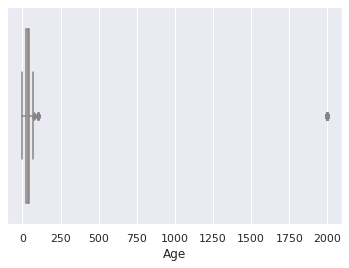

In [707]:
sns.boxplot(df['Age'] ,color='pink')

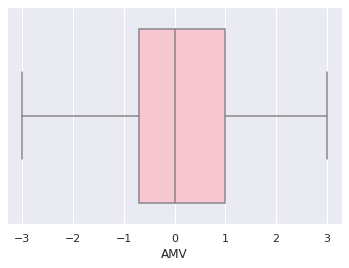

In [708]:
sns.boxplot(df['AMV'] ,color='pink')

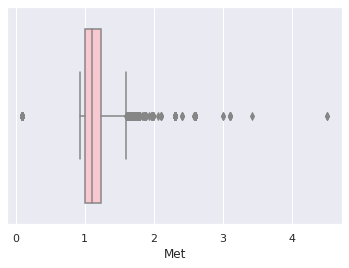

In [709]:
sns.boxplot(df['Met'] ,color='pink')

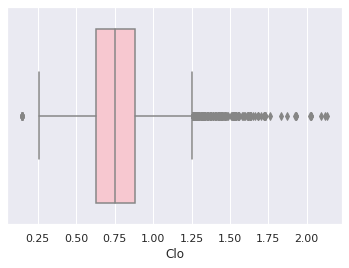

In [710]:
sns.boxplot(df['Clo'] ,color='pink')

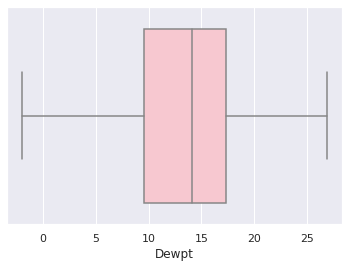

In [711]:
sns.boxplot(df['Dewpt'] ,color='pink')

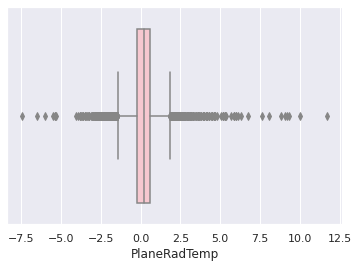

In [712]:
sns.boxplot(df['PlaneRadTemp'] ,color='pink')

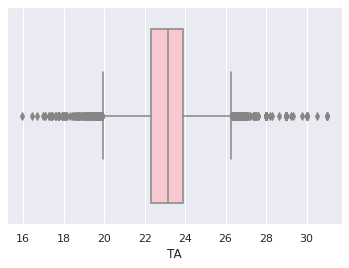

In [713]:
sns.boxplot(df['TA'] ,color='pink')

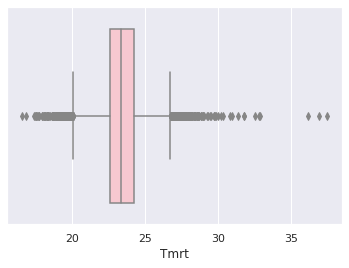

In [714]:
sns.boxplot(df['Tmrt'] ,color='pink')

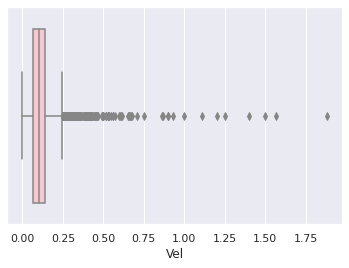

In [715]:
sns.boxplot(df['Vel'] ,color='pink')

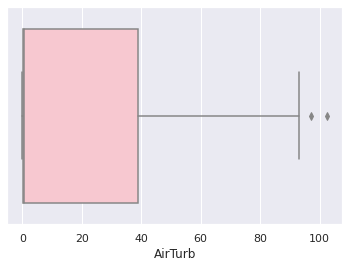

In [716]:
sns.boxplot(df['AirTurb'] ,color='pink')

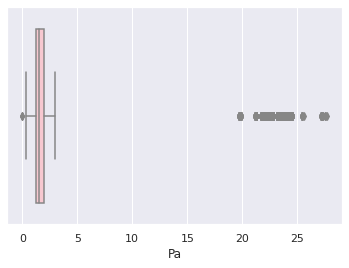

In [717]:
sns.boxplot(df['Pa'] ,color='pink')

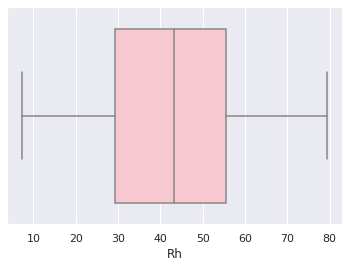

In [718]:
sns.boxplot(df['Rh'] ,color='pink')

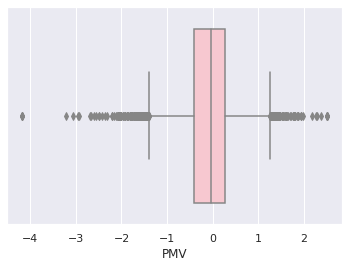

In [719]:
sns.boxplot(df['PMV'] ,color='pink')

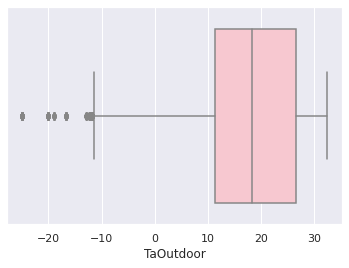

In [720]:
sns.boxplot(df['TaOutdoor'] ,color='pink')

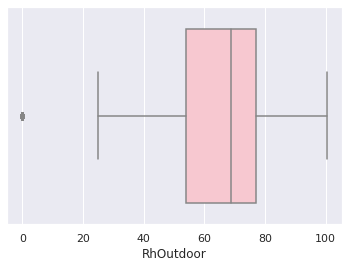

In [721]:
sns.boxplot(df['RhOutdoor'] ,color='pink')

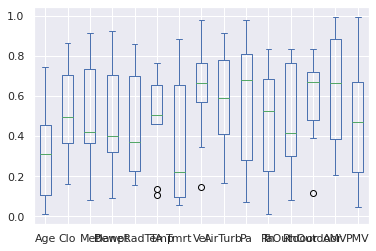

In [722]:
df = pd.DataFrame(np.random.rand(10, 15), columns=['Age', 'Clo', 'Met', 'Dewpt', 'PlaneRadTemp', 'TA', 'Tmrt', 'Vel', 'AirTurb','Pa','Rh','TaOutdoor','RhOutdoor','AMV','PMV'])
df.plot.box(grid='True')



skewness of data check:

In [723]:
df = pd.read_excel(r'/content/CollectedData (1).xlsx',"Sheet4")
ames = ['Age', 'Clo', 'Met', 'Dewpt', 'PlaneRadTemp', 'TA', 'Tmrt', 'Vel', 'AirTurb','Pa','Rh','TaOutdoor','RhOutdoor','AMV','PMV']
df = pd.read_excel(r'/content/CollectedData (1).xlsx',"Sheet4",names=names)
df.skew(axis = 0, skipna = True)

Age             2.076948
Clo             1.074832
Met            -0.680373
Dewpt          -0.176999
PlaneRadTemp    1.319895
TA              0.539956
Tmrt            0.584769
Vel             5.937499
AirTurb         0.909956
Pa              1.754840
Rh             -0.074354
TaOutdoor      -0.861976
RhOutdoor      -1.444755
AMV            -0.220232
PMV            -0.393333
dtype: float64


4.   **OUTLIERS**




                          *Finding outliers of each coloumn*

through IQR method

In [724]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df['Age'])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))
print('\n')

outliers = find_outliers_IQR(df['Clo'])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))
print('\n')


outliers = find_outliers_IQR(df['Met'])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))
print('\n')

outliers = find_outliers_IQR(df['Dewpt'])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))
print('\n')

outliers = find_outliers_IQR(df['PlaneRadTemp'])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))
print('\n')


outliers = find_outliers_IQR(df['TA'])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))
print('\n')


outliers = find_outliers_IQR(df['Tmrt'])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))
print('\n')

outliers = find_outliers_IQR(df['Vel'])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))
print('\n')


outliers = find_outliers_IQR(df['AirTurb'])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))
print('\n')

outliers = find_outliers_IQR(df['Pa'])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))
print('\n')

outliers = find_outliers_IQR(df['Rh'])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))
print('\n')


outliers = find_outliers_IQR(df['TaOutdoor'])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))
print('\n')

outliers = find_outliers_IQR(df['RhOutdoor'])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))
print('\n')

outliers = find_outliers_IQR(df['AMV'])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))
print('\n')


outliers = find_outliers_IQR(df['PMV'])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))
print('\n')

number of outliers: 1359
max outlier value: 1996.0
min outlier value: 75.0


number of outliers: 373
max outlier value: 2.13
min outlier value: 0.15


number of outliers: 1731
max outlier value: 4.5
min outlier value: 0.1


number of outliers: 0
max outlier value: nan
min outlier value: nan


number of outliers: 452
max outlier value: 11.7
min outlier value: -7.42


number of outliers: 539
max outlier value: 31.0
min outlier value: 15.96


number of outliers: 343
max outlier value: 37.445
min outlier value: 16.61


number of outliers: 309
max outlier value: 1.88
min outlier value: 0.24899999999999997


number of outliers: 2
max outlier value: 102.45
min outlier value: 97.25


number of outliers: 1352
max outlier value: 27.7
min outlier value: 0.0


number of outliers: 0
max outlier value: nan
min outlier value: nan


number of outliers: 124
max outlier value: -11.9
min outlier value: -24.9


number of outliers: 1349
max outlier value: 0.0
min outlier value: 0.0


number of outliers: 0


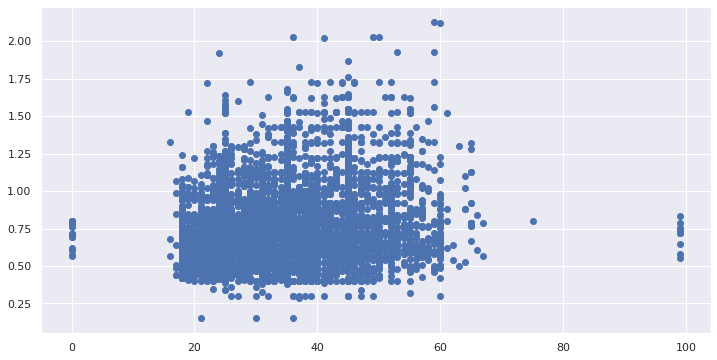

In [725]:
fig, ax = plt.subplots(figsize=(12,6))  #plotting to check the diverisity of data
ax.scatter(df['Age'], df['Clo'])
plt.show()

                             **Smoothing Outiers**

outliers effect our end result and predictions so its better to avoid dropping them

In [726]:
median = df.loc[df['Age']<0, 'Age'].median()
df["Age"] = df["Age"].mask(df["Age"] >0, median)

median = df.loc[df['Clo']<0, 'Clo'].median()
df["Clo"] = df["Clo"].mask(df["Clo"] >0, median)

median = df.loc[df['Met']<0, 'Met'].median()
df["Met"] = df["Met"].mask(df["Met"] >0, median)

median = df.loc[df['PlaneRadTemp']<0, 'PlaneRadTemp'].median()
df["PlaneRadTemp"] = df["PlaneRadTemp"].mask(df["PlaneRadTemp"] >0, median)

median = df.loc[df['TA']<0, 'TA'].median()
df["TA"] = df["TA"].mask(df["TA"] >0, median)

median = df.loc[df['Tmrt']<0, 'Tmrt'].median()
df["Tmrt"] = df["Tmrt"].mask(df["Tmrt"] >0, median)

median = df.loc[df['Vel']<0, 'Vel'].median()
df["Vel"] = df["Vel"].mask(df["Vel"] >0, median)

median = df.loc[df['Pa']<0, 'Pa'].median()
df["Pa"] = df["Pa"].mask(df["Pa"] >0, median)


                         *Removing outliers of each column*

should only be dropped when the have zero effect on the otput


3.   **DEALING WITH NULL AND MISSING VALUES**



In [727]:
df = pd.read_excel(r'/content/CollectedData (1).xlsx',"Sheet4")
ames = ['Age', 'Clo', 'Met', 'Dewpt', 'PlaneRadTemp', 'TA', 'Tmrt', 'Vel', 'AirTurb','Pa','Rh','TaOutdoor','RhOutdoor','AMV','PMV']
df = pd.read_excel(r'/content/CollectedData (1).xlsx',"Sheet4",names=names)
df.isna().sum()  #checking for missing values

Age             2915
Clo             1406
Met             1887
Dewpt           3551
PlaneRadTemp    7021
TA                20
Tmrt            3701
Vel             3700
AirTurb         5600
Pa              4655
Rh                35
TaOutdoor       1368
RhOutdoor         19
AMV               55
PMV              696
dtype: int64

predicting values using mean method

In [728]:
updated_df = df
updated_df['TA']=updated_df['TA'].fillna(updated_df['TA'].mean())

In [729]:
updated_df = df
updated_df['Rh']=updated_df['Rh'].fillna(updated_df['Rh'].mean())

In [730]:
updated_df = df
updated_df['RhOutdoor']=updated_df['RhOutdoor'].fillna(updated_df['RhOutdoor'].mean())

In [731]:
updated_df = df
updated_df['AMV']=updated_df['AMV'].fillna(updated_df['AMV'].mean())

In [732]:
df.isna().sum()  #checking for missing values

Age             2915
Clo             1406
Met             1887
Dewpt           3551
PlaneRadTemp    7021
TA                 0
Tmrt            3701
Vel             3700
AirTurb         5600
Pa              4655
Rh                 0
TaOutdoor       1368
RhOutdoor          0
AMV                0
PMV              696
dtype: int64

deleting rows containing missing values

In [733]:
#removing null values
print("Number of Rows Before: ",df.shape[0])
print("Number of rows containing null data:",df.isnull().sum().sum())
df.dropna(inplace=True)
print("Number of rows containing null data after removal:",df.isnull().sum().sum())
print("Number of Rows After: ",df.shape[0])


Number of Rows Before:  12565
Number of rows containing null data: 36500
Number of rows containing null data after removal: 0
Number of Rows After:  2072


final data frame

In [734]:
df.isna().sum()  #checking for missing values

Age             0
Clo             0
Met             0
Dewpt           0
PlaneRadTemp    0
TA              0
Tmrt            0
Vel             0
AirTurb         0
Pa              0
Rh              0
TaOutdoor       0
RhOutdoor       0
AMV             0
PMV             0
dtype: int64


5.  **VARIANCE**



In [735]:
df.var()  #variance

Age             105.463131
Clo               0.083087
Met               0.045763
Dewpt            20.549088
PlaneRadTemp      1.272964
TA                1.095066
Tmrt              1.368500
Vel               0.001570
AirTurb           0.051226
Pa                0.186719
Rh              216.401674
TaOutdoor       161.959173
RhOutdoor       126.007820
AMV               1.346707
PMV               0.268424
dtype: float64

**variance filter**

In [736]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(df)
var_thres.get_support()
df.columns[var_thres.get_support()]
constant_columns = [column for column in df.columns
                    if column not in df.columns[var_thres.get_support()]]

print(len(constant_columns))
for feature in constant_columns:
     print(feature)
df.drop(constant_columns,axis=1)

0


,Age,Clo,Met,Dewpt,PlaneRadTemp,TA,Tmrt,Vel,AirTurb,Pa,Rh,TaOutdoor,RhOutdoor,AMV,PMV
1454,33.0,0.62,1.000000,8.80,0.400,23.80,23.40,0.09,0.380000,1.130000,37.8,14.60,68.00,-1.0,-0.70
1455,32.0,1.23,1.300000,8.80,0.500,24.10,23.30,0.07,0.310000,1.140000,37.6,14.60,68.00,1.0,0.73
1456,37.0,0.72,1.600000,8.80,0.300,23.90,23.30,0.10,0.210000,1.140000,37.9,14.60,68.00,-1.0,0.57
1457,35.0,0.68,1.200000,8.60,0.500,23.10,22.60,0.13,0.320000,1.120000,39.2,14.60,68.00,0.0,-0.33
1458,49.0,0.40,1.400000,8.60,0.400,23.00,22.10,0.10,0.330000,1.120000,39.5,14.60,68.00,-1.0,-0.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9191,26.0,0.44,1.340785,11.67,0.372,22.42,22.63,0.11,0.149333,1.370667,51.0,26.95,75.75,-0.9,-0.47
9192,40.0,0.45,1.539420,11.07,0.270,21.94,21.92,0.12,0.166333,1.317333,50.0,26.95,75.75,2.0,-0.25
9193,42.0,0.56,1.390444,10.80,-5.361,23.44,23.47,0.10,0.527333,1.293333,45.0,26.95,75.75,-1.0,0.09
9194,35.0,0.77,1.539420,10.80,0.366,21.64,21.61,0.12,0.379000,1.293333,50.0,26.95,75.75,-3.0,0.20


**6A**- 
    **CORRELATION MATRIX**

In [737]:
df.corr()

,Age,Clo,Met,Dewpt,PlaneRadTemp,TA,Tmrt,Vel,AirTurb,Pa,Rh,TaOutdoor,RhOutdoor,AMV,PMV
Age,1.000000,0.240512,-0.111826,-0.252213,0.240857,-0.026537,-0.173269,-0.186408,-0.080238,-0.258878,-0.269463,-0.281645,0.110483,-0.013327,0.013945
Clo,0.240512,1.000000,-0.120635,-0.541106,0.304955,-0.224251,-0.400948,-0.242309,-0.080016,-0.548182,-0.526814,-0.579883,0.094800,-0.091870,0.427068
Met,-0.111826,-0.120635,1.000000,0.143908,-0.151074,-0.043195,0.058810,0.145824,0.061703,0.146575,0.164916,0.184064,-0.119279,0.010811,0.632621
Dewpt,-0.252213,-0.541106,0.143908,1.000000,-0.407342,0.268856,0.542980,0.372482,0.119538,0.936944,0.916056,0.824509,-0.063069,0.034845,0.042357
PlaneRadTemp,0.240857,0.304955,-0.151074,-0.407342,1.000000,-0.107366,-0.312858,-0.305484,-0.061157,-0.431833,-0.429618,-0.449638,0.163749,-0.042223,-0.039588
TA,-0.026537,-0.224251,-0.043195,0.268856,-0.107366,1.000000,0.873239,-0.053859,0.006267,0.269584,0.078532,0.204907,0.036344,0.468736,0.316647
Tmrt,-0.173269,-0.400948,0.058810,0.542980,-0.312858,0.873239,1.000000,0.228709,0.079559,0.536647,0.381365,0.490708,-0.130139,0.400566,0.284701
Vel,-0.186408,-0.242309,0.145824,0.372482,-0.305484,-0.053859,0.228709,1.000000,-0.059689,0.363098,0.386076,0.407676,-0.177028,-0.048466,-0.086389
AirTurb,-0.080238,-0.080016,0.061703,0.119538,-0.061157,0.006267,0.079559,-0.059689,1.000000,0.115458,0.118313,0.141863,-0.048464,0.014690,0.051493
Pa,-0.258878,-0.548182,0.146575,0.936944,-0.431833,0.269584,0.536647,0.363098,0.115458,1.000000,0.979463,0.876086,-0.072822,0.048581,0.050402


heat map

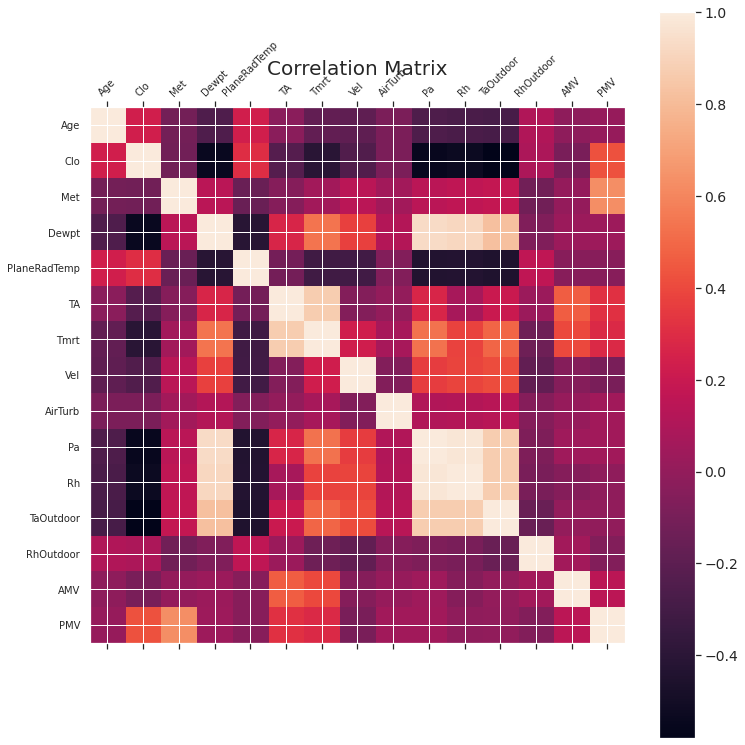

In [738]:
f = plt.figure(figsize=(12, 13))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=20);

**6B-**
         INFORMATIVE DIMENSIONS


For PMV:
Most informative dimensions: Age, Vel, AirTurb, Pa, Rh, TaOutdoor, RhOutdoor
Least informative dimensions: AMV, Met, Clo, Dewpt, PlaneRadtemp, Ta, Tmrt
 
For AMV:
Most informative dimensions: Age, Met, Clo, Vel, AirTurb, Pa, Rh, TaOutdoor, RhOutdoor
Least informative dimensions: Dewpt, PlaneRadTemp, Ta, Tmrt, PMV


In [739]:
X = df[['Age', 'AMV', 'Met', 'Clo', 'Dewpt', 'PlaneRadTemp', 'TA', 'Tmrt', 'Vel', 'AirTurb', 'Pa', 'Rh', 'PMV', 'TaOutdoor', 'RhOutdoor']]

In [740]:
v_t = VarianceThreshold(threshold = 0)

In [741]:
v_t.fit(X)

VarianceThreshold(threshold=0)

In [742]:
v_t.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

7- **ENTROPY AND INFORMATION GAIN**




In [743]:
def entropy1(df):
    prob = df.value_counts(normalize = True)
    entropy = -1 * np.sum(np.log2(prob) * prob)
    return round(entropy, 3)
print(entropy1(df['Age']))
print(entropy1(df['Clo']))
print(entropy1(df['Met']))
print(entropy1(df['Dewpt']))
print(entropy1(df['PlaneRadTemp']))
print(entropy1(df['TA']))
print(entropy1(df['Tmrt']))
print(entropy1(df['Vel']))
print(entropy1(df['AirTurb']))
print(entropy1(df['Pa']))
print(entropy1(df['Rh']))
print(entropy1(df['TaOutdoor']))
print(entropy1(df['RhOutdoor']))
print(entropy1(df['AMV']))
print(entropy1(df['PMV']))


5.329
6.137
4.601
9.074
8.622
7.821
7.87
3.694
8.554
9.398
7.25
6.158
5.737
3.599
7.601


In [744]:
def compute_impurity(feature, impurity_criterion):
    probs = feature.value_counts(normalize=True)
    
    if impurity_criterion == 'entropy':
        impurity = -1 * np.sum(np.log2(probs) * probs)
    else:
        raise ValueError('Unknown impurity criterion')
        
    return(round(impurity, 3))
print('impurity using entropy:', compute_impurity(df, 'entropy'))

impurity using entropy: 11.017


In [745]:
def comp_feature_information_gain(df, target, feature):
    target_entropy = entropy1(df[target])
    entropy_list = []
    weight_list = []
    for i in df[feature].unique():
        feature_level = df[df[feature] == i]
        entropy_level = entropy1(feature_level[target])
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(feature_level) / len(df)
        weight_list.append(round(weight_level, 3))
    remaining_entropy = np.sum(np.array(entropy_list) * np.array(weight_list))
    information_gain = target_entropy - remaining_entropy
    return information_gain


for i in df.drop(columns = 'AMV').columns:
    info_gain = comp_feature_information_gain(df, 'AMV', i)
    print(i)
    print(round(info_gain, 3))

Age
0.57
Clo
0.83
Met
0.598
Dewpt
2.316
PlaneRadTemp
2.512
TA
1.845
Tmrt
1.86
Vel
0.378
AirTurb
2.457
Pa
2.484
Rh
1.22
TaOutdoor
0.834
RhOutdoor
0.724
PMV
1.354


#        **PART B**

splitting the data randomly into 80/20 percent. Where 80% represents the training data. Also normalizing the dataset as you see fit.

In [856]:
# splitting the data randomly into 80/20 percent. Where 80% represents the training data. Also normalizing the dataset as you see fit.
from sklearn.model_selection import train_test_split
X = df.drop(['PMV'], axis=1)
y = df['PMV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [857]:
# importing the necessary libraries
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
import mlxtend as ml
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [858]:
#Apply forward selection, considering PMV as response variable
sfs1 = sfs(LinearRegression(),
              k_features=14,
                forward=True,
                verbose=2,
                scoring='r2',
                cv=0)
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished

[2022-12-04 17:55:40] Features: 1/14 -- score: 0.4108045690014257[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished

[2022-12-04 17:55:40] Features: 2/14 -- score: 0.6668467816846253[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished

[2022-12-04 17:55:40] Features: 3/14 -- score: 0.8991435311023502[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [859]:
#Apply backward selection, considering PMV as response variable
sfs2 = sfs(LinearRegression(),
              k_features=14,
                forward=False,
                verbose=2,
                scoring='r2',
                cv=0)
sfs2 = sfs2.fit(X_train, y_train)

In [860]:
selected_feat_names = ['Age', 'Clo', 'TA', 'Tmrt', 'Vel', 'Pa', 'TaOutdoor']
print(selected_feat_names)

['Age', 'Clo', 'TA', 'Tmrt', 'Vel', 'Pa', 'TaOutdoor']


In [861]:
print(sfs2.k_feature_names_)

('Age', 'Clo', 'Met', 'Dewpt', 'PlaneRadTemp', 'TA', 'Tmrt', 'Vel', 'AirTurb', 'Pa', 'Rh', 'TaOutdoor', 'RhOutdoor', 'AMV')


In [862]:
df_copy = df.copy()

In [863]:
df_copy.loc[df_copy["AMV"] < 0.5, "AMV"] = 0
df_copy.loc[df_copy["AMV"] >= 0.5, "AMV"] = 1

In [864]:
df_copy.loc[df_copy["PMV"] < 0.5, "PMV"] = 0
df_copy.loc[df_copy["PMV"] >= 0.5, "PMV"] = 1

again

In [865]:
# splitting the data randomly into 80/20 percent. Where 80% represents the training data. Also normalizing the dataset as you see fit.
from sklearn.model_selection import train_test_split
X = df_copy.drop(['AMV'], axis=1)
y = df_copy['AMV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [866]:
# Apply forward selection, considering AMV as response variable 
sfs3 = sfs(LogisticRegression(),
                k_features=8,
                forward=True,
                verbose=2,
                scoring='accuracy',
                cv=0)
sfs3 = sfs3.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.1s finished

[2022-12-04 17:55:41] Features: 1/8 -- score: 0.7893783946891973[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished

[2022-12-04 17:55:41] Features: 2/8 -- score: 0.7929993964996982[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.2s finished

[2022-12-04 17:55:41] Features: 3/8 -- score: 0.7929993964996982[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [867]:
print(sfs3.k_feature_names_)

('Age', 'Clo', 'Met', 'TA', 'AirTurb', 'Pa', 'TaOutdoor', 'RhOutdoor')


In [868]:
y_train.shape

(1657,)

In [869]:
#Apply backward selection, considering AMV as response variable
sfs4 = sfs(LogisticRegression(),
                k_features=14,
                forward=False,
                verbose=2,
                scoring='accuracy',
                cv=0)
sfs4 = sfs4.fit(X_train, y_train)

In [870]:
print(sfs4.k_feature_names_)

('Age', 'Clo', 'Met', 'Dewpt', 'PlaneRadTemp', 'TA', 'Tmrt', 'Vel', 'AirTurb', 'Pa', 'Rh', 'TaOutdoor', 'RhOutdoor', 'PMV')


In [871]:
regression_PMV_features = ['Age', 'Clo', 'TA', 'Tmrt', 'Vel', 'Pa', 'TaOutdoor']    
regression_AMV_features = ['Age', 'Clo', 'TA', 'Tmrt', 'Vel', 'Pa', 'TaOutdoor', 'RhOutdoor']


classification_PMV_features = ['Age', 'Clo', 'TA', 'Tmrt', 'Vel', 'Pa', 'TaOutdoor']
classification_AMV_features = ['Age', 'Clo', 'TA', 'Tmrt', 'Vel', 'Pa', 'TaOutdoor', 'RhOutdoor']


In [872]:
from sklearn.model_selection import train_test_split
X = df[regression_PMV_features]
y = df['PMV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [873]:
# apply 3-fold cross validation for both regression and classification problems
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# define the model
model = LinearRegression()

# define the evaluation procedurae
cv = KFold(n_splits=3, random_state=1, shuffle=True)

# evaluate the model
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)

# report performance
print('R2: %.3f (%.3f)' % ((scores).mean(), scores.std()))

R2: 0.469 (0.009)


In [874]:
from sklearn.model_selection import train_test_split
X = df[regression_AMV_features]
y = df['AMV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [875]:
# apply 3-fold cross validation for both regression and classification problems
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# define the model
model = LinearRegression()

# define the evaluation procedurae
cv = KFold(n_splits=3, random_state=1, shuffle=True)

# evaluate the model
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)

# report performance
print('R2: %.3f (%.3f)' % ((scores).mean(), scores.std()))

R2: 0.212 (0.019)


2x times with logistic regression

In [876]:
df_copy.loc[df_copy["AMV"] < 0.5, "AMV"] = 0
df_copy.loc[df_copy["AMV"] >= 0.5, "AMV"] = 1

In [877]:
df_copy.loc[df_copy["PMV"] < 0.5, "PMV"] = 0
df_copy.loc[df_copy["PMV"] >= 0.5, "PMV"] = 1

In [878]:
from sklearn.model_selection import train_test_split
X = df[classification_PMV_features]
y = df['PMV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [879]:
# apply 3-fold cross validation for both regression and classification problems
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# define the model
model = LinearRegression()

# define the evaluation procedurae
cv = KFold(n_splits=3, random_state=1, shuffle=True)

# evaluate the model
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)

# report performance
print('R2: %.3f (%.3f)' % ((scores).mean(), scores.std()))

R2: 0.469 (0.009)


In [880]:
df_copy.loc[df_copy["AMV"] < 0.5, "AMV"] = 0
df_copy.loc[df_copy["AMV"] >= 0.5, "AMV"] = 1

In [881]:
df_copy.loc[df_copy["PMV"] < 0.5, "PMV"] = 0
df_copy.loc[df_copy["PMV"] >= 0.5, "PMV"] = 1

In [882]:
from sklearn.model_selection import train_test_split
X = df[classification_PMV_features]
y = df['AMV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [883]:
# apply 3-fold cross validation for both regression and classification problems
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# define the model
model = LinearRegression()

# define the evaluation procedurae
cv = KFold(n_splits=3, random_state=1, shuffle=True)

# evaluate the model
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)

# report performance
print('R2: %.3f (%.3f)' % ((scores).mean(), scores.std()))

R2: 0.210 (0.017)


In [884]:
print(y_pred)

[-0.24972766 -0.69766806 -0.47517086 ... -0.51157408 -0.0289476
 -0.24409658]


In [885]:
print(y_test)

8466   -0.500000
2187   -1.000000
2132   -1.000000
8576    0.000000
1865    1.000000
          ...   
2226   -1.000000
2047    1.000000
8794    0.100584
7992    1.000000
9151    0.000000
Name: AMV, Length: 415, dtype: float64


In [ ]:
# plot confusion matrix for the classification part.
y_pred = cross_val_predict(model, X_train, y_train, cv=3)
conf_mat = confusion_matrix(y_train, y_pred)
print(conf_mat)
 